In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dow_jones_index.csv")
data

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


In [3]:
data['high'] = data['high'].str.replace('$', '')
data['open'] = data['open'].str.replace('$', '')
data['low'] = data['low'].str.replace('$', '')
data['close'] = data['close'].str.replace('$', '')
data['next_weeks_open'] = data['next_weeks_open'].str.replace('$', '')
data['next_weeks_close'] = data['next_weeks_close'].str.replace('$', '')

C:\Users\HP\AppData\Local\Temp\ipykernel_11780\598260326.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['high'] = data['high'].str.replace('$', '')
C:\Users\HP\AppData\Local\Temp\ipykernel_11780\598260326.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['open'] = data['open'].str.replace('$', '')
C:\Users\HP\AppData\Local\Temp\ipykernel_11780\598260326.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['low'] = data['low'].str.replace('$', '')
C:\Users\HP\AppData\Local\Temp\ipykernel_11780\5982603

In [4]:
data['high']=pd.to_numeric(data['high'])
data['open']=pd.to_numeric(data['open'])
data['low']=pd.to_numeric(data['low'])
data['close']=pd.to_numeric(data['close'])
data['next_weeks_open']=pd.to_numeric(data['next_weeks_open'])
data['next_weeks_close']=pd.to_numeric(data['next_weeks_close']) 

In [5]:
data['percent_change_volume_over_last_wk'].fillna(value=0,inplace=True)
data['previous_weeks_volume'].fillna(value=0,inplace=True)

In [6]:
data

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,0.000000,0.0,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.00424,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.52161,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.42098,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,80.00,80.82,78.33,79.02,100521400,-1.22500,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786


In [7]:
import scipy.stats
corr,_=scipy.stats.pearsonr(data['high'],data['low'])
print(corr)

0.9994191540117697


In [8]:
corr,_=scipy.stats.pearsonr(data['volume'],data['open'])
print(corr)

-0.5134239596601641


In [9]:
corr,_=scipy.stats.pearsonr(data['days_to_next_dividend'],data['next_weeks_close'])
print(corr)

-0.06772514422301334


In [10]:
corr,_=scipy.stats.pearsonr(data['open'],data['close'])
print(corr)

0.999044034320146


In [11]:
corr,_=scipy.stats.pearsonr(data['percent_change_volume_over_last_wk'],data['percent_change_price'])
print(corr)

-0.22956755048417227


In [12]:
corr,_=scipy.stats.pearsonr(data['next_weeks_open'],data['next_weeks_close'])
print(corr)

0.9988798616255573


In [13]:
corr,_=scipy.stats.pearsonr(data['days_to_next_dividend'],data['percent_return_next_dividend'])
print(corr)

0.12174809745628305


[]

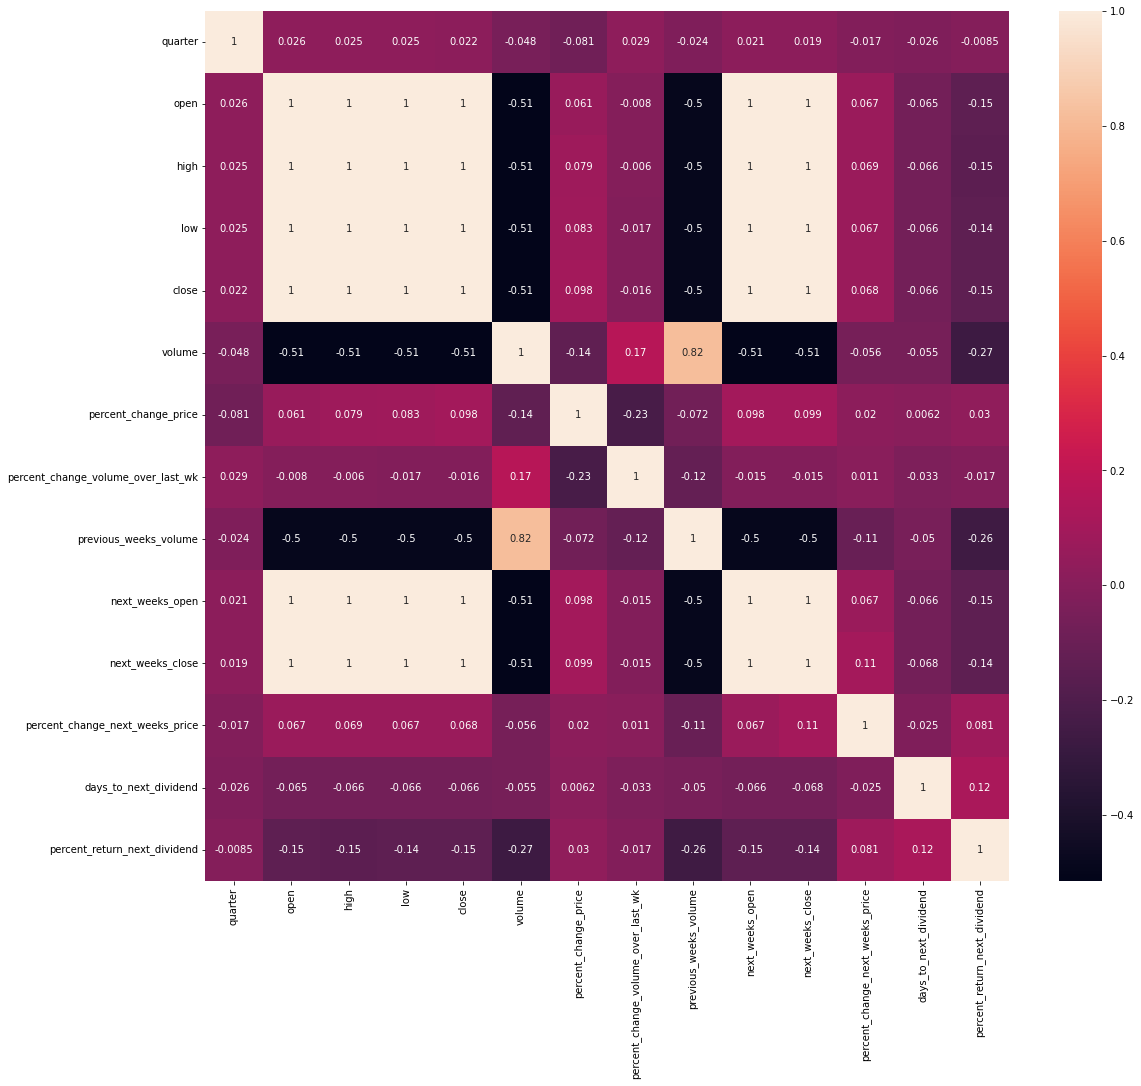

In [14]:
from matplotlib.pyplot import figure
figure(figsize=(18, 16))
sns.heatmap(data.corr(),annot=True)
plt.plot()

Estimated coefficients:
c = -0.19404242022824292         
m = 0.9664206201909


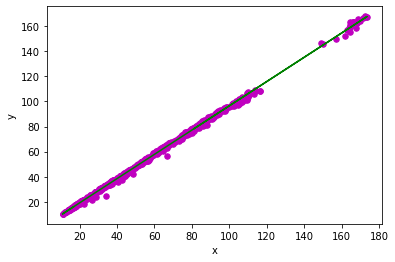

In [15]:
#Simple Linear Regression

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
            marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()

def main():
    # observations / data
    x = np.array(data['high'])
    y = np.array(data['low'])

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nc = {} \
        \nm = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)

if __name__ == "__main__":
    main()


In [16]:
from scipy.stats import chi2_contingency

# defining the table
data_c = [data['low'],data['open'],data['high']]
stat, p, dof, expected = chi2_contingency(data_c)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (H0 holds true)')


p value is 1.0
Independent (H0 holds true)


In [17]:

from scipy.stats import ttest_ind

# defining the table
stat, p = ttest_ind(data['low'],data['open'])

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (H0 holds true)')


p value is 0.5452473592620216
Independent (H0 holds true)


In [18]:

from scipy.stats import ttest_ind

# defining the table
stat, p = ttest_ind(data['high'],data['close'])

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (H0 holds true)')


p value is 0.581045977109643
Independent (H0 holds true)


In [19]:
#anova two way
# Importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a dataframe
dataframe = pd.DataFrame({'Fertilizer': np.repeat(['daily', 'weekly'], 15),
						'Watering': np.repeat(['daily', 'weekly'], 15),
						'height': [14, 16, 15, 15, 16, 13, 12, 11,
									14, 15, 16, 16, 17, 18, 14, 13,
									14, 14, 14, 15, 16, 16, 17, 18,
									14, 13, 14, 14, 14, 15]})


# Performing two-way ANOVA
model = ols('height ~ C(Fertilizer) + C(Watering) +\
C(Fertilizer):C(Watering)',
			data=dataframe).fit()
result = sm.stats.anova_lm(model, type=2)

# Print the result
print(result)


                             df     sum_sq   mean_sq         F    PR(>F)
C(Fertilizer)               1.0   0.033333  0.033333  0.012069  0.913305
C(Watering)                 1.0   1.027463  1.027463  0.372012  0.546828
C(Fertilizer):C(Watering)   1.0   0.577010  0.577010  0.208918  0.651144
Residual                   28.0  77.333333  2.761905       NaN       NaN


In [22]:
import scipy.stats as st
st.f_oneway(data['high'],data['low'],data['open'])

F_onewayResult(statistic=0.7242002902172524, pvalue=0.4848251428613093)